In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import seaborn as sns

%matplotlib inline

# Load Data

In [2]:
# df = pd.read_csv('../data/airborne_data.csv', parse_dates=['timestamp'], index_col='timestamp')
# df = pd.read_csv('../../data/airborne_data_20241015.csv', parse_dates=['timestamp'], index_col='timestamp')
df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')

/tmp/ipykernel_2842785/1611110707.py:3: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')


# Plot

### Figure 6

In [3]:
mixed = df[df['regime'] == 'heavy_mixed']
mixed_aged = mixed[~((mixed['NOx_delta']/mixed['CH3CN_delta'] > 3) & (mixed['C2Cl4_delta'] > mixed['C2Cl4_delta'].median()))]
mixed_fresh = mixed[((mixed['NOx_delta']/mixed['CH3CN_delta'] > 3) & (mixed['C2Cl4_delta'] > mixed['C2Cl4_delta'].median()))]

/tmp/ipykernel_2842785/1712963830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixed.sort_values('CH3CN_delta', inplace=True)
/home/jpalmo/.conda/envs/o3fire/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/jpalmo/.conda/envs/o3fire/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


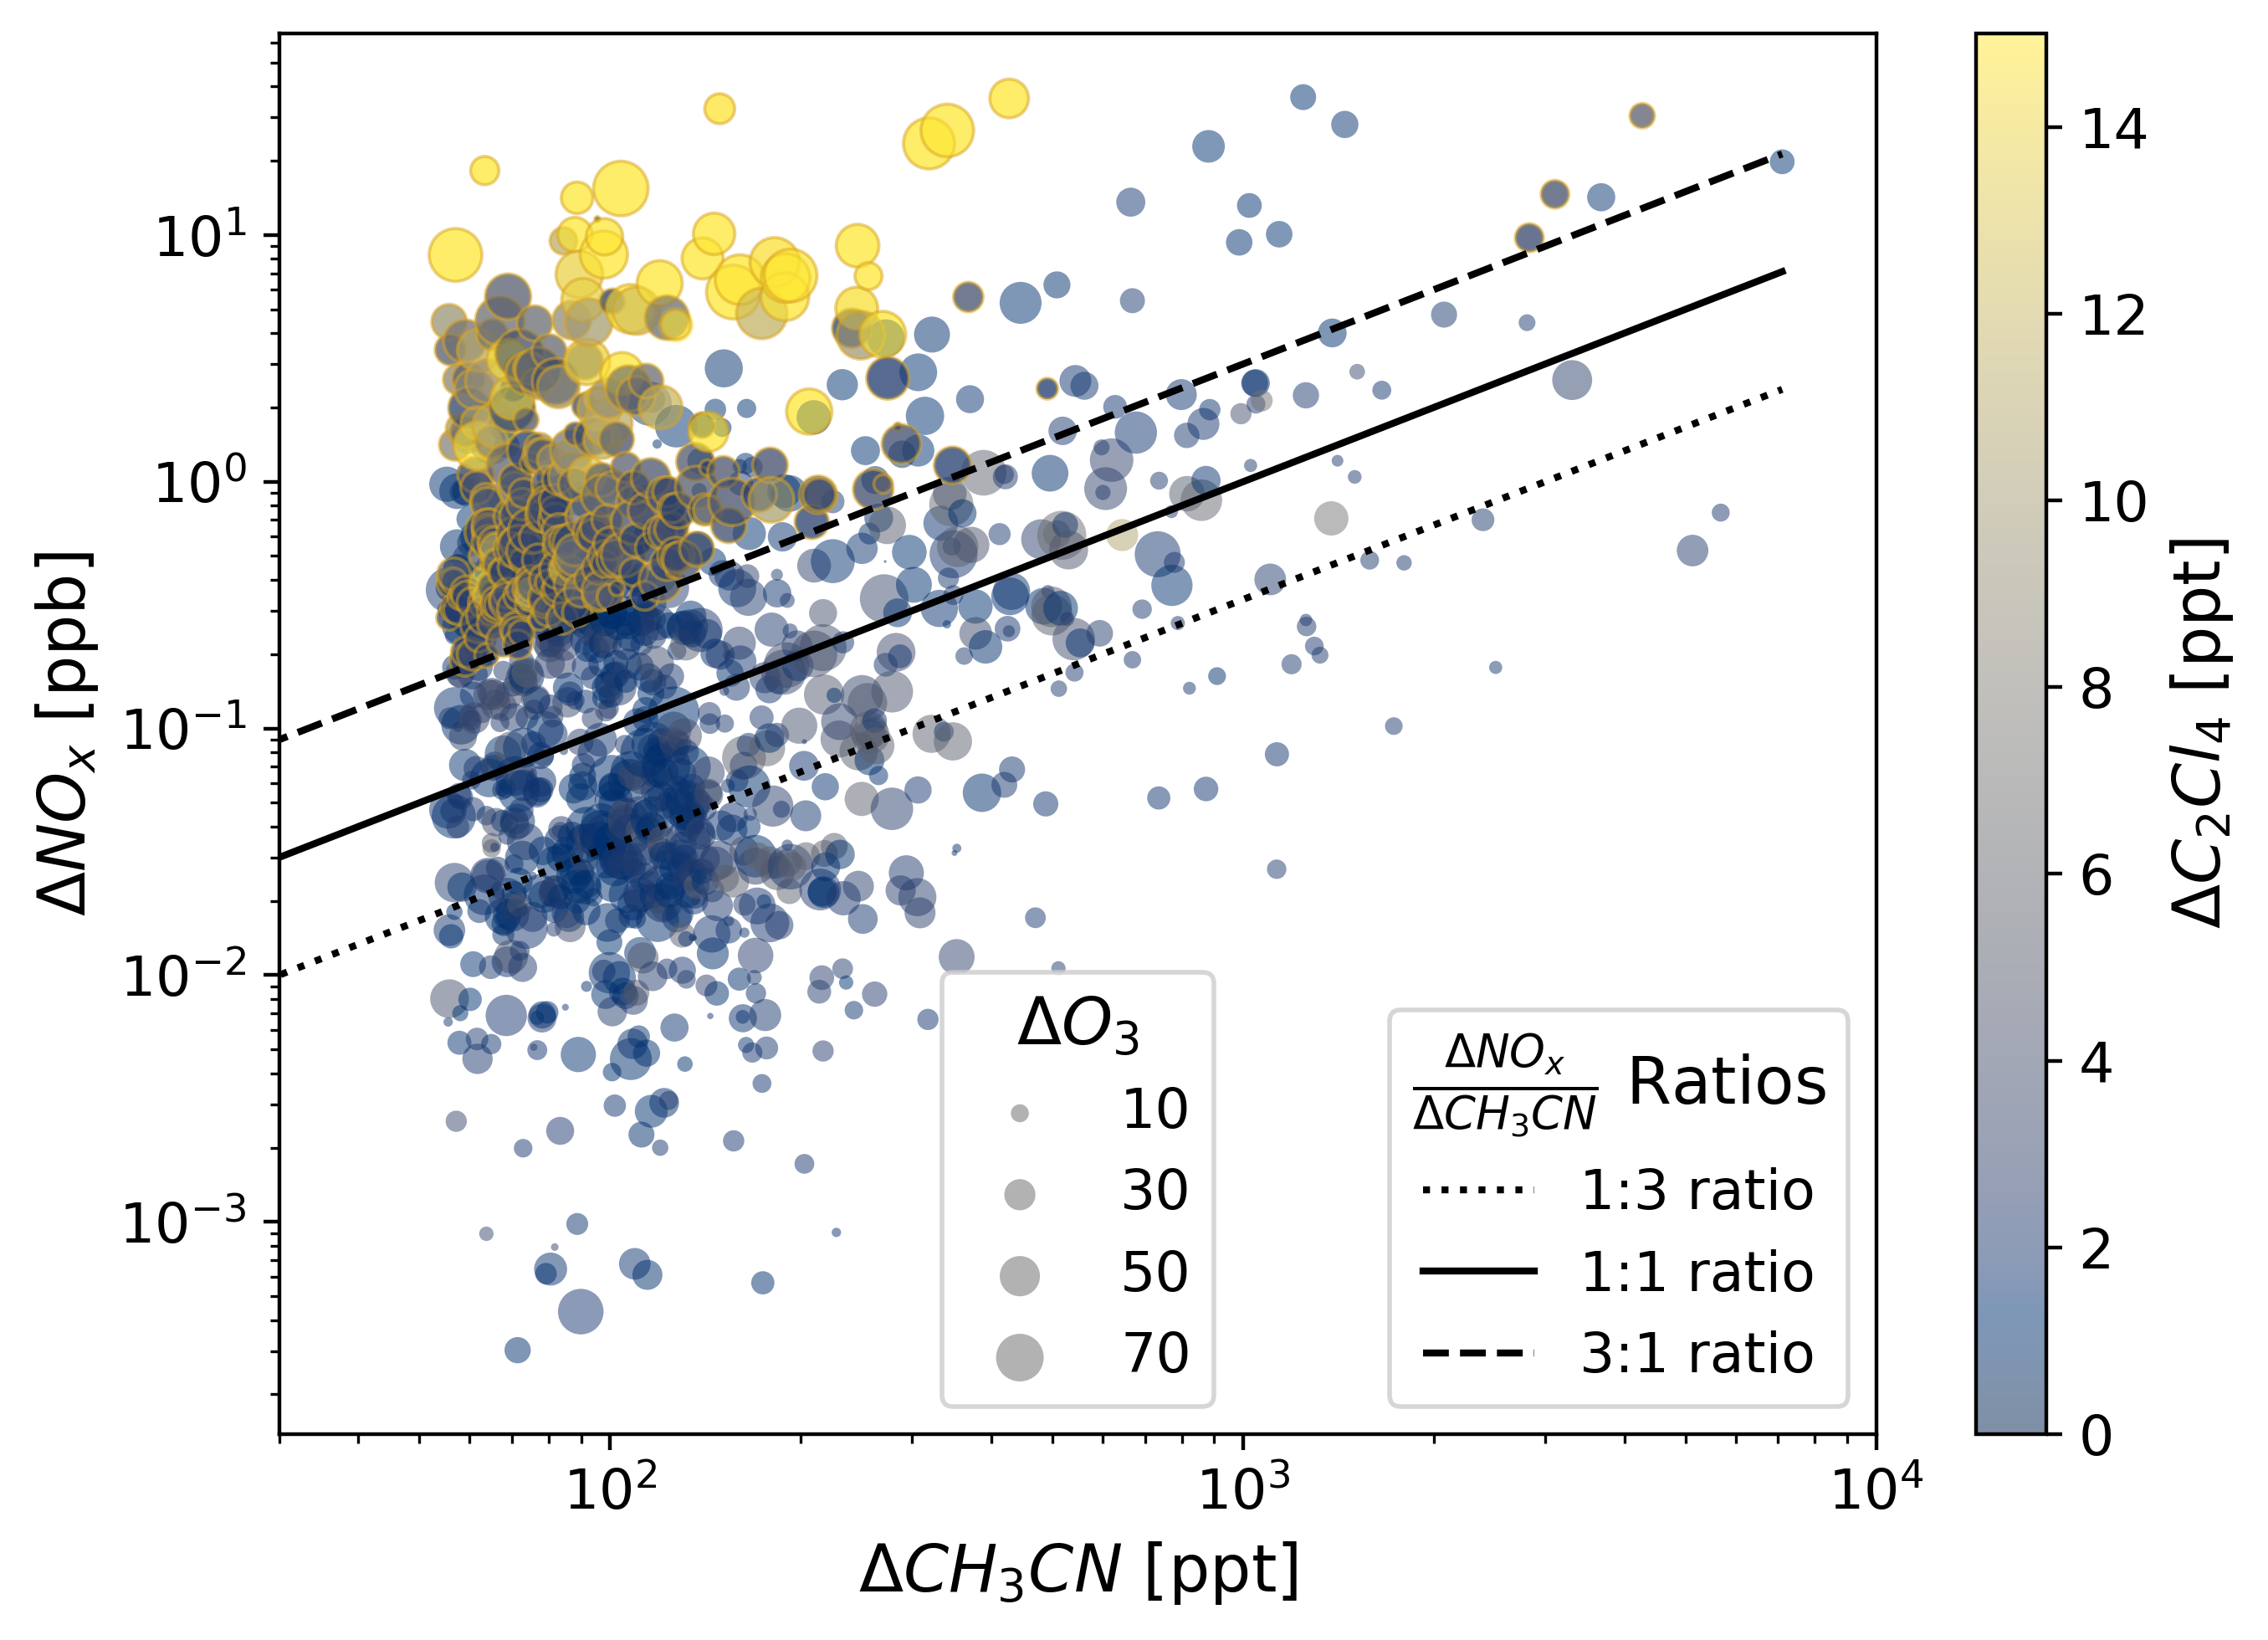

In [9]:
# Assuming mixed is already defined and sorted
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5), dpi=400)

mixed.sort_values('CH3CN_delta', inplace=True)

# Apply square root scaling to the sizes
scaled_sizes = mixed['O3_delta'] * 1e-3
size_factor = 1.5

# Plot for mixed DataFrame
p1 = ax1.scatter(mixed['CH3CN_delta'], mixed['NOx_delta']*1e-3, c=mixed['C2Cl4_delta'], s=scaled_sizes * size_factor, 
                 alpha=0.5, vmin=0, vmax=15, cmap='cividis', edgecolors='None')


# Apply square root scaling to the sizes
scaled_sizes = mixed_fresh['O3_delta'] * 1e-3
size_factor = 1.5
mixed_fresh = mixed[((mixed['NOx_delta']/mixed['CH3CN_delta'] > 3) & (mixed['C2Cl4_delta'] > mixed['C2Cl4_delta'].median()))]
ax1.scatter(mixed_fresh['CH3CN_delta'], mixed_fresh['NOx_delta']*1e-3, c=mixed_fresh['C2Cl4_delta'], s=scaled_sizes * size_factor, 
                 alpha=0.5, vmin=0, vmax=15, cmap='cividis', edgecolors='goldenrod', linewidths=0.7)

# Plot ratio lines
ax1.plot(mixed['CH3CN_delta'], (1/3) * mixed['CH3CN_delta']*1e-3, color='black', linestyle=':', label='1:3 ratio')
ax1.plot(mixed['CH3CN_delta'], mixed['CH3CN_delta']*1e-3, color='black', linestyle='-', label='1:1 ratio')
ax1.plot(mixed['CH3CN_delta'], 3 * mixed['CH3CN_delta']*1e-3, color='black', linestyle='--', label='3:1 ratio')

ax1.set_xlim(3e1, 1e4)
ax1.set_xscale('log')
ax1.set_yscale('log')

# Colorbar
cbar = fig.colorbar(p1, ax=ax1)
# Change the font size of the colorbar tick labels
cbar.ax.tick_params(labelsize=12)  # Set tick label font size to 14
# Change the font size of the colorbar label
cbar.set_label(r'$\Delta C_2Cl_4$ [ppt]', fontsize=14)  # Set label font size to 16

# Create the first legend for the ratio lines
ratio_legend = ax1.legend(loc='lower right', title=r'$\frac{\Delta NO_x}{\Delta CH_3CN}$ Ratios', fontsize=12)
ratio_legend.get_title().set_fontsize(14)

# Add the ratio legend back after creating the second legend
ax1.add_artist(ratio_legend)

# Create a custom legend for sizes
size_legend_values = np.array([10, 30, 50, 70])
size_legend_labels = [str(size) for size in size_legend_values]

# Create proxy artists for the size legend
size_handles = [plt.scatter([], [], s=size * size_factor, c='gray', alpha=0.6, edgecolors='None') for size in size_legend_values]
size_legend = ax1.legend(size_handles, size_legend_labels, title=r'$\Delta O_3$', loc='lower center', fontsize=12)
size_legend.get_title().set_fontsize(14)

# Set labels and title
ax1.set_xlabel(r'$\Delta CH_3CN$ [ppt]', fontsize=14)
ax1.set_ylabel(r'$\Delta NO_x$ [ppb]', fontsize=14)
# ax1.set_title('Mixed Regime')

ax1.tick_params(axis='both', labelsize=12)

plt.tight_layout()
#save figure as pdf
plt.savefig("../../figures/fig_06.pdf", bbox_inches='tight', dpi=300)
plt.show()
###
#########

In [6]:
# Get the 'cividis' colormap
cividis = cm.get_cmap('cividis')

# Access specific colors from the colormap
color_1 = cividis(0.1)  # Color at 10% of the colormap
color_2 = cividis(0.25)  # Color at 50% of the colormap (middle)
color_3 = cividis(0.5)  # Color at 50% of the colormap (middle)
color_4 = cividis(0.75)  # Color at 50% of the colormap (middle)
color_5 = cividis(0.9)  # Color at 90% of the colormap

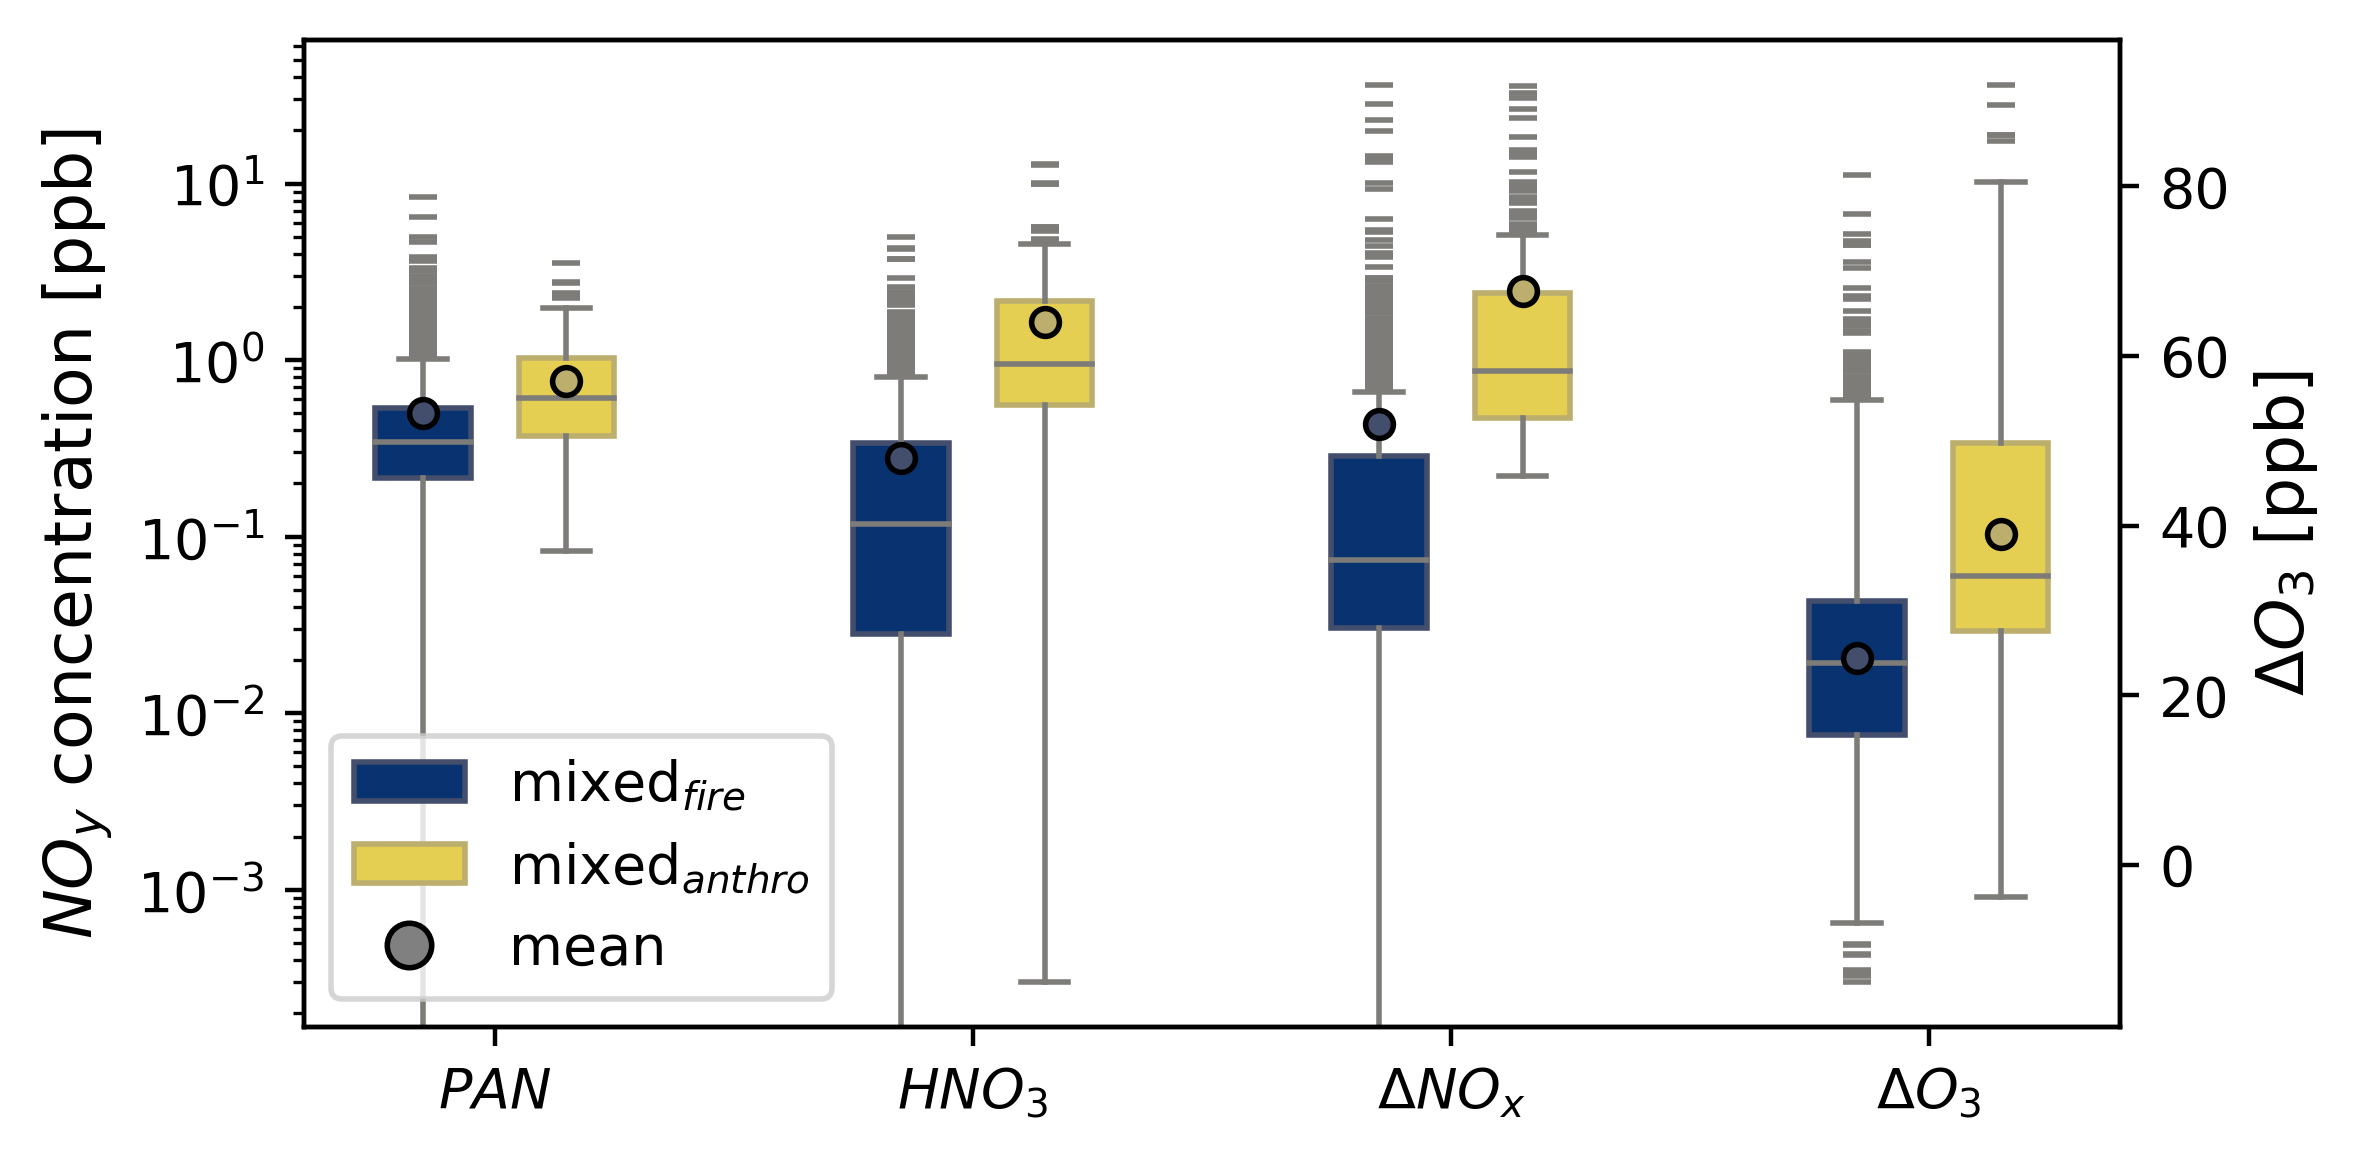

In [10]:

# Assuming mixed_aged and mixed_fresh are pandas dataframes with the relevant columns

# Create lists to hold data for plotting
quantities = ['PAN', 'HNO3', 'NOx', 'O3_delta']  # Names of the quantities
data_aged = [mixed_aged[q].dropna()*1e-3 for q in quantities]  # Data for group A
data_fresh = [mixed_fresh[q].dropna()*1e-3 for q in quantities]  # Data for group B

# Create figure and two axes
fig, ax1 = plt.subplots(figsize=(6, 3), dpi=400)

whiskerprops=dict(color=color_3, linewidth=1,)
capprops=dict(color=color_3, linewidth=1,)
flierprops=dict(marker='_', markerfacecolor=color_3, markeredgecolor=color_3, markersize=5,)

# Plot boxplots for the first three quantities (same scale)
box_A = ax1.boxplot(data_aged[:3], positions=np.array(range(3)) * 2.0 - 0.3, widths=0.4, patch_artist=True,
                    boxprops=dict(facecolor=color_1, color=color_2), medianprops=dict(color=color_3), whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops,
                    showmeans=True, meanprops=dict(marker='o', markerfacecolor=color_2, markeredgecolor='black', markersize=5),
                    labels=quantities[:3])

box_B = ax1.boxplot(data_fresh[:3], positions=np.array(range(3)) * 2.0 + 0.3, widths=0.4, patch_artist=True,
                    boxprops=dict(facecolor=color_5, color=color_4), medianprops=dict(color=color_3), whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops,
                    showmeans=True, meanprops=dict(marker='o', markerfacecolor=color_4, markeredgecolor='black', markersize=5),labels=quantities[:3])

# Add labels and title
ax1.set_xticks(np.array(range(3)) * 2.0)
ax1.set_xticklabels(quantities[:3])
ax1.set_ylabel('Value (normal scale)')
ax1.set_ylabel(r'$NO_y$ concentration [ppb]', fontsize=12)
# ax1.set_title('Comparison of Quantities Across Two Populations')

# Now plot the quantity with a different y-scale on a separate axis (same x-axis)
ax2 = ax1.twinx()

# Access the 'O3_delta' column correctly from mixed_aged and mixed_fresh
box_A_diff = ax2.boxplot([mixed_aged['O3_delta']*1e-3], positions=[6.0 - 0.3], widths=0.4, patch_artist=True,
                    boxprops=dict(facecolor=color_1, color=color_2), medianprops=dict(color=color_3), whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops,
                    showmeans=True, meanprops=dict(marker='o', markerfacecolor=color_2, markeredgecolor='black', markersize=5),labels=['O3_delta'],)


box_B_diff = ax2.boxplot([mixed_fresh['O3_delta']*1e-3], positions=[6.0 + 0.3], widths=0.4, patch_artist=True,
                    boxprops=dict(facecolor=color_5, color=color_4), medianprops=dict(color=color_3), whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops,
                    showmeans=True, meanprops=dict(marker='o', markerfacecolor=color_4, markeredgecolor='black', markersize=5),labels=['O3_delta'])


ax1.set_yscale('log')
# Set the labels for ax2
ax2.set_ylabel(r'$\Delta O_3$ [ppb]', fontsize=12)

# Define custom tick positions (these should correspond to the boxplot positions)
tick_positions = np.array(range(4)) * 2.0  # Typically boxplots are numbered starting from 1
# Set tick positions
ax1.set_xticks(tick_positions)
# Set custom tick labels
labels = [r'$PAN$', r'$HNO_3$', r'$\Delta NO_x$', r'$\Delta O_3$']
ax1.set_xticklabels(labels)


# Create legend elements: two patches and one marker
patch1 = Patch(facecolor=color_1, edgecolor=color_2, label=r'mixed$_{fire}$')
patch2 = Patch(facecolor=color_5, edgecolor=color_4, label=r'mixed$_{anthro}$')  # Add a second group if needed
mean_marker = Line2D([0], [0], marker='o', linestyle='None', color='black', label='mean',
                     markerfacecolor='grey', markersize=8)

# Add the legend with the custom patches and marker
ax1.legend(handles=[patch1, patch2, mean_marker], loc='lower left')



# Adjust layout to prevent overlap
plt.tight_layout()
#save figure as pdf
plt.savefig("../../figures/supfig_10.pdf", bbox_inches='tight', dpi=300)
plt.show()
